In [1]:
# Q3: Do the attributes of a song play a role in the amount of streams across platforms? (Chase).

In [2]:
# Looking to see if there is a correlation between the danceability, energy, loudness, speechiness, acousticness, and instrumentalness
# liveness, and valence contribute to a difference in streams across YouTube and Spotify.

# Visualization - Heatmap

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr
import scipy.stats as stats

# Data Loading and Cleaning
filepath = '../data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
custom_palette = sns.color_palette(["#BC4749", "#F2E8CF", "#A7C957", "#6A994E", "#386641"]) #adjusting for heatmap. Order maps bottom up on heatmap


sns.set_palette(custom_palette)

In [4]:
# drop null values
df = data.dropna(how="any")

# drop 2, 3, 6, 13, 14, 16 18, 19, 20, and 21.
df2_test = df.drop(columns=["Album", "Album_type", "Key", "Tempo", "Duration_ms", "Channel", "Likes", "Comments", "Licensed", "official_video", "Title"])

# drop any characters that are non-english for the artist name for cleanliness
df2 = df2_test[df2_test['Artist'].str.contains(r'^[a-zA-Z\s]+$', na=False)]

# convert Views and streams to non-scientific notation values
df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))


C:\Users\Chase\AppData\Local\Temp\ipykernel_5968\3374351524.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['693555221.00' '72011645.00' '8435055.00' ... '35646.00' '6533.00'
 '158697.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))
C:\Users\Chase\AppData\Local\Temp\ipykernel_5968\3374351524.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1040234854.00' '310083733.00' '63063467.00' ... '6226110.00'
 '6873961.00' '5695584.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))


In [5]:
#1. Streams and Views: Why Analyze Them Together?
#Complementary Measures of Popularity:
#Streams represent audio-only consumption, while Views incorporate a visual component. By analyzing them together, you can understand whether a song’s attributes influence its popularity across different platform types.
#Example: A song might do well in Streams because it’s great for playlists, but it might not perform as well in Views if it lacks a compelling visual element.
#Platform-Specific Insights:
#Streams and Views allow us to compare trends across audio-centric platforms (Spotify, Apple Music) and video-centric platforms (YouTube). By studying both, you can identify if certain song attributes (e.g., Danceability or Energy) universally drive popularity or are platform-specific.
#Example: A high-energy dance track might excel in both Streams and Views if it inspires dance trends but might show stronger effects on Views due to its shareability in videos.



In [6]:
####################################################################################################################################################################################

In [7]:
# Start org_1 for data viz
# First, I want to group the artists by views and artists by streams to see the different artist counts -- create a bar chart for VIZ and reference.
# This way, we can compare the Views and Stream for a random sampling of artists. 5-10 Max.

# Second, I 

In [8]:
# create org_1 df to aggregate the artists in str

org_1 = df2.groupby('Artist').agg({
    'Views': 'sum',
    'Stream': 'sum'
}).reset_index()

# Ensure 'Views' and 'Stream' columns are numeric
org_1['Views'] = pd.to_numeric(df2['Views'], errors='coerce')
org_1['Stream'] = pd.to_numeric(df2['Stream'], errors='coerce')

org_1 = org_1.dropna(how="any")

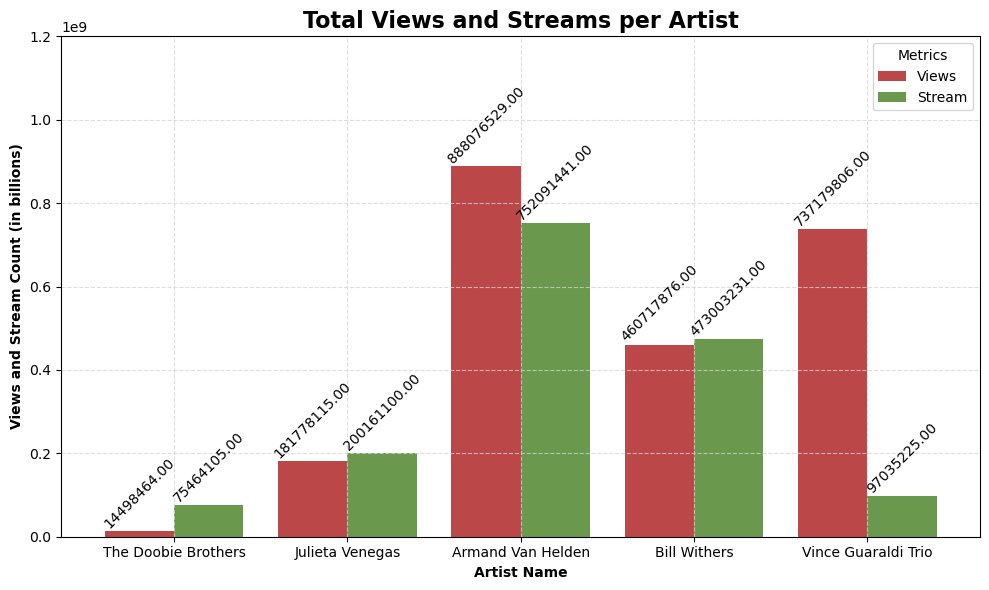

In [9]:
# Get a random sample of 10 artists from the org_1 DataFrame
random_sample_artists = org_1.sample(n=5, random_state=1)  # random_state for reproducibility

# Set the index to 'Artist' for plotting
random_sample_artists.set_index('Artist', inplace=True)

# Convert columns to numeric if necessary
random_sample_artists['Views'] = pd.to_numeric(random_sample_artists['Views'], errors='coerce')
random_sample_artists['Stream'] = pd.to_numeric(random_sample_artists['Stream'], errors='coerce')

# Check the data types again after conversion
random_sample_artists.describe()

# Select only numeric columns for plotting
random_sample_artists_numeric = random_sample_artists[["Views", "Stream"]]

# Plotting
ax = random_sample_artists_numeric.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#BC4749','#6A994E'])

# Set display format for the y-axis to non-scientific notation
for label in ax.get_yticklabels():
    try:
        label_text = label.get_text().replace('−', '-')
        label.set_text('{:.2f}'.format(float(label_text)))
    except ValueError:
        pass

# Display values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', rotation=45)

plt.title('Total Views and Streams per Artist', fontsize=16, fontweight="bold")
plt.xlabel("Artist Name", fontweight="bold")
plt.ylabel("Views and Stream Count (in billions)",fontweight="bold")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.xticks(rotation=0)
plt.ylim(0,12e8)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [10]:
# Genres

# Doobie Brothers - Soft Rock
# Julieta Venegas - Latin Pop
# Armand Van Helden - EDM
# Bill Withers - R&B/Soul
# Vince Guaraldi Trio - Jazz

In [11]:
# HEATMAP
# Drop non-float values from the Dataset
df3 = df2.drop(columns=["Artist", "Track", "Views", "Stream",])

In [12]:
# Create Corrs DF for Heatmap
corrs = df3.corr()
corrs

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
Danceability,1.000000,0.242208,0.365255,0.234237,-0.283953,-0.324668,-0.083090,0.467910
Energy,0.242208,1.000000,0.744206,0.102104,-0.671815,-0.309957,0.176505,0.396861
Loudness,0.365255,0.744206,1.000000,0.089626,-0.560937,-0.552249,0.088866,0.319577
Speechiness,0.234237,0.102104,0.089626,1.000000,-0.100898,-0.112793,0.048827,0.071809
Acousticness,-0.283953,-0.671815,-0.560937,-0.100898,1.000000,0.280363,-0.062080,-0.221188
Instrumentalness,-0.324668,-0.309957,-0.552249,-0.112793,0.280363,1.000000,-0.051333,-0.268956
Liveness,-0.083090,0.176505,0.088866,0.048827,-0.062080,-0.051333,1.000000,0.033186
Valence,0.467910,0.396861,0.319577,0.071809,-0.221188,-0.268956,0.033186,1.000000


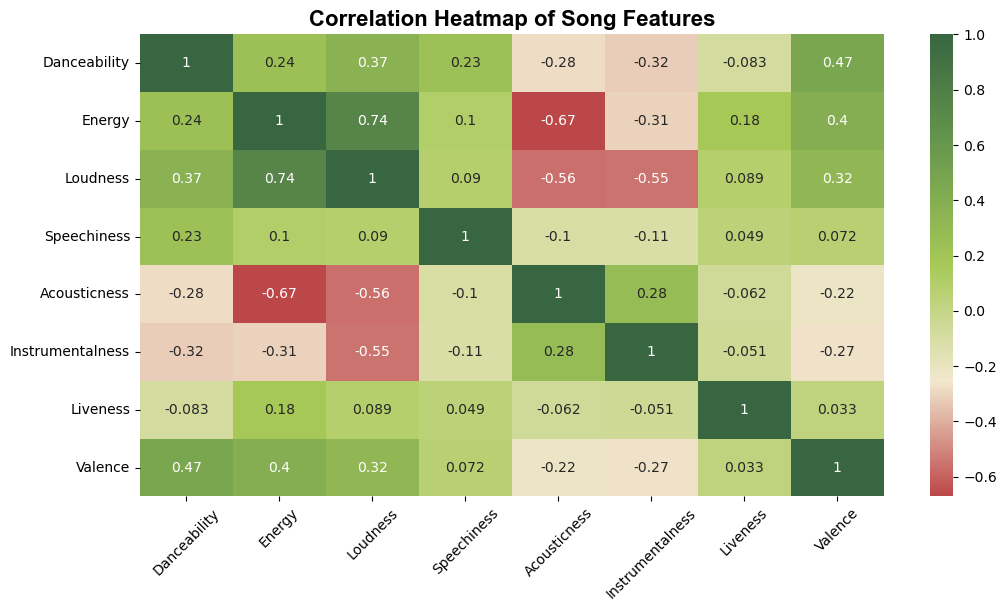

In [13]:
# Build the Heatmap
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Define your custom color palette
colors = ["#BC4749", "#F2E8CF", "#A7C957", "#6A994E", "#386641"]
custom_palette = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Create a heatmap with the custom gradient color palette
sns.heatmap(corrs, annot=True, cmap=custom_palette)

# Customization for title only
plt.title("Correlation Heatmap of Song Features", fontweight="bold", fontsize=16, fontfamily="Arial")

# Rotate X Ticks
plt.xticks(rotation=45)

# Show/Save the Graph
plt.show()